# Prep
Import used libs and modules

In [1]:
import Bio
import urllib
import pandas as pd
import nglview as nv

from matplotlib import pyplot as plt

from Bio.Seq import Seq
from Bio.Blast import NCBIWWW
# from Bio.Alphabet import IUPAC
from collections import Counter
from Bio.Data import CodonTable
from Bio import SeqIO, SearchIO
from Bio.PDB import PDBParser,MMCIFParser
from Bio.SeqUtils import GC,molecular_weight
# from Bio.Alphabet import generic_dna,generic_rna,generic_protein

# Understanding FASTA
*FASTA format* is a text format often used to represent nucleotide or peptide sequences. In FASTA format base pairs or amino acids are represented using single-letter codes. 
The nucleic acid codes are:

        A --> adenosine           M --> A C (amino)
        C --> cytidine            S --> G C (strong)
        G --> guanine             W --> A T (weak)
        T --> thymidine           B --> G T C
        U --> uridine             D --> G A T
        R --> G A (purine)        H --> A C T
        Y --> T C (pyrimidine)    V --> G C A
        K --> G T (keto)          N --> A G C T (any)
                                  -  gap of indeterminate length

The accepted amino acid codes are:

        A ALA alanine                         P PRO proline
        B ASX aspartate or asparagine         Q GLN glutamine
        C CYS cystine                         R ARG arginine
        D ASP aspartate                       S SER serine
        E GLU glutamate                       T THR threonine
        F PHE phenylalanine                   U     selenocysteine
        G GLY glycine                         V VAL valine
        H HIS histidine                       W TRP tryptophan
        I ILE isoleucine                      Y TYR tyrosine
        K LYS lysine                          Z GLX glutamate or glutamine
        L LEU leucine                         X     any
        M MET methionine                      *     translation stop
        N ASN asparagine                      -     gap of indeterminate length



## Download the SARS-cov2 genome sequence

**Note:**You can skip over this part and just use the `sars.fasta` file provided in this folder.

If you want to download this file by yourself, you can use EDirect a tool provided by NCBI that provides access to its databases from the terminal. You can read more about [EDirect and how to install it here](https://www.ncbi.nlm.nih.gov/books/NBK179288/), but the installation is as simple as follows:

**1 - First install EDirect**
```
sh -c "$(curl -fsSL ftp://ftp.ncbi.nlm.nih.gov/entrez/entrezdirect/install-edirect.sh)"
```
**2 - Add to your path**
```
export PATH=${PATH}:${HOME}/edirect
```

After you have installed EDirect you can download the SARS-cov2 sequence from NCBI 
[The sequence can be find here under the id: MN908947](https://www.ncbi.nlm.nih.gov/nuccore/MN908947.3).
So to download that using EDirect you can use the following command:
```
esearch -db nucleotide -query "MN908947" | efetch -format fasta > sars.fasta
```
The `sars.fasta` is just the name we decided to give to the fasta file stored locally.


## Having a look at the sequence

As a quick reminder:
* DNA (Deoxy-Ribonucleic Acid) constitutes of 4 Bases A T G C
* RNA (Ribonucleic Acid) is composed of U instead of T

In [3]:
# Read the sequence using SeqIO
fread = SeqIO.read("sars.fasta", "fasta")

In [4]:
# Let's print the sequence:
print(fread)

ID: MN908947.3
Name: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


In [5]:
# We can access some of these variables shown above, read more in the docs
print(fread.id)
print(fread.description)

MN908947.3
MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome


In [6]:
# Get the sequence in a variable
seq = fread.seq

In [7]:
seq

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [8]:
# we can even check the molecular weight of the sequence 
mw = molecular_weight(seq)
print(f'Molecular weight: {mw}')

Molecular weight: 9241219.214400413


## 3. Sequence manipulation using Biopython

Manipulating a sequence, some operations we can do

In [9]:
# Indexing and choosing a slice
seq[0:4]

Seq('ATTA')

In [10]:
# Searching for a codon
seq.find('CG')

43

In [11]:
# Concatenating sequences/slices by using the + operator
seq[0:4] + seq[7:10]

Seq('ATTAGTT')

In [12]:
# Exploring the GC content
seq[44:].find('CG')

print(f"GC count: {seq.count('CG')}")

# Using the `GC` method is equivalent to counting the percentage of G and C in the whole sequence
print(GC(seq))
GC(seq) == 100*(seq.count('G') + seq.count('C'))/len(seq)

GC count: 439
37.97277865097148


True

In [13]:
# Finding complementary DNA
seq.complement()

Seq('TAATTTCCAAATATGGAAGGGTCCATTGTTTGGTTGGTTGAAAGCTAGAGAACA...TTT')

In [14]:
GC(seq.complement()) == GC(seq)

True

In [15]:
# we can also use reverse complement to reverse it
# as you can see here the last 10 characters are 
# the reverse of the first 10 characters in the complement
print(seq.complement()[:10])
print((seq.reverse_complement())[-10:])

TAATTTCCAA
AACCTTTAAT


## 4. Transcription & Translation Studies

<div class="alert alert-block alert-warning" style="font-size:16px">
DNA > RNA = Transcription
</div>
<div class="alert alert-block alert-warning" style="font-size:16px">
mRNA > amino acid (protein) = Translation
</div>

In [16]:
mRNA = seq.transcribe()

In [17]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [18]:
proteins = seq.translate()

/Users/ismail/RestInGit/sars-cov-2/venv/lib/python3.9/site-packages/Bio/Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [19]:
mRNA.translate()

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [20]:
proteins

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [21]:
proteins.back_transcribe()

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [22]:
Counter(proteins).most_common()

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472),
 ('I', 436),
 ('K', 413),
 ('G', 394),
 ('A', 375),
 ('H', 332),
 ('Q', 325),
 ('P', 292),
 ('D', 290),
 ('E', 270),
 ('W', 263),
 ('M', 117)]

<BarContainer object of 21 artists>

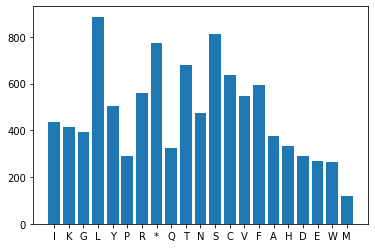

In [23]:
plt.bar(Counter(proteins).keys(), Counter(proteins).values())

In [24]:
plist = proteins.split('*')
large_proteins = [x for x in plist if len(x)>10]

In [25]:
large_proteins

[Seq('QTNQLSISCRSVL'),
 Seq('TNFKICVAVTRLHA'),
 Seq('QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER'),
 Seq('DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS'),
 Seq('TALCVHQTFGCSNCTSWSCYG'),
 Seq('AGSRTRRHSVRS'),
 Seq('DTWCPCPSCGRNTSGLPQGSSS'),
 Seq('SFMHFVRTTGLY'),
 Seq('HLQWGMSKFCISLKFHNQDYSTKG'),
 Seq('NSICLSSCVTK'),
 Seq('MQPNVPFNSHEV'),
 Seq('RRCHYLWLLTPKCCC'),
 Seq('NLLSSMSQFRSRT'),
 Seq('GWSHYCLWRLCVLLCWLP'),
 Seq('PYRCCWRRFRRS'),
 Seq('NTPKRESQHQYCW'),
 Seq('RDRHYFGIFFCFHKCFCGNCERFGL'),
 Seq('TEINTESSLCICIRGCSCCTINFLPHS'),
 Seq('NCSKFCACFTEGRYNNTRWNFTVFTETH'),
 Seq('QSSCNGLHYRWCCSVDFAVAN'),
 Seq('NCRWTNCHLCKGN'),
 Seq('NICHALKGIVQKVC'),
 Seq('IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW'),
 Seq('RAYVARNQRHRKVLCPCT'),
 Seq('YDGNKQYLHTQRRCTNKGYFW'),
 Seq('HCDRSARLQECEYHF'),
 Seq('VRLCCGRCCHKNFATSI'),
 Seq('IGFTYVLFFLPSR'),
 Seq('TFGIWCHFCCSST'),
 Seq('GQSDNYYSNNC'),
 Seq('GSTSIRDGTYTSCSDY'),
 Seq('SARSSTCTIIISWYFWC'),
 Seq('PYTFFKSLCRYCSHKCLLSCL'),
 Seq('QTCFKLFGNEE'),
 Seq('WQSSSRFCHSC'),
 Seq('

In [26]:
df = pd.DataFrame({'proteins':large_proteins})

In [27]:
df['plen']=df['proteins'].map(len)

In [28]:
df

,proteins,plen
0,"(Q, T, N, Q, L, S, I, S, C, R, S, V, L)",13
1,"(T, N, F, K, I, C, V, A, V, T, R, L, H, A)",14
2,"(Q, D, T, S, N, S, S, I, F, C, R, L, L, T, V, ...",35
3,"(D, G, E, P, C, P, W, F, Q, R, E, N, T, R, P, ...",46
4,"(T, A, L, C, V, H, Q, T, F, G, C, S, N, C, T, ...",21
...,...,...
185,"(F, L, Q, T, I, A, T, I, H, E, Q, C)",12
186,"(L, N, S, G, L, N, S, C, R, P, H, K, A, D, G, ...",27
187,"(S, H, I, A, I, F, N, Q, C, V, T, L, G, R, T)",15
188,"(K, S, H, H, I, F, T, E, A, T, R, S, T, I, E, ...",43


In [29]:
df = df.sort_values(by='plen', ascending=False)

In [30]:
df

,proteins,plen
118,"(C, T, I, V, F, K, R, V, C, G, V, S, A, A, R, ...",2701
157,"(A, S, A, Q, R, S, Q, I, T, L, H, I, N, E, L, ...",290
168,"(T, N, M, K, I, I, L, F, L, A, L, I, T, L, A, ...",123
158,"(A, Q, A, D, E, Y, E, L, M, Y, S, F, V, S, E, ...",83
167,"(Q, Q, M, F, H, L, V, D, F, Q, V, T, I, A, E, ...",63
...,...,...
38,"(K, C, L, L, H, S, T, I, Y, Y, L)",11
132,"(T, S, T, C, T, S, N, C, L, W, T)",11
34,"(W, Q, S, S, S, R, F, C, H, S, C)",11
33,"(Q, T, C, F, K, L, F, G, N, E, E)",11


In [31]:
sp=df.nlargest(1, 'plen').iloc[0,0]

In [32]:
f'>large protein\n{sp}'

'>large protein\nCTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACIRRPFLCCKCCYDHVISTSHKLVLSVNPYVCNAPG

In [33]:
with open('protein.fasta', 'w') as f:
    f.write(f'>large protein\n{sp}')

# Basic Local Sequence Alignment NCBI-BLAST

In [34]:
read = SeqIO.read('protein.fasta', 'fasta')
read.seq

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [35]:
from pprint import pprint

In [36]:
%%time
result_handle = NCBIWWW.qblast('blastp', 'pdb', read.seq)
blast_res = SearchIO.read(result_handle, 'blast-xml')

CPU times: user 88.3 ms, sys: 16.8 ms, total: 105 ms
Wall time: 1min 1s


In [37]:
pprint([(x.description, x.id) for x in blast_res[0:5]])

[('Chain A, RNA-directed RNA polymerase [Severe acute respiratory syndrome '
  'coronavirus 2]',
  'pdb|7D4F|A'),
 ('Chain A, nsp12 [Severe acute respiratory syndrome coronavirus 2]',
  'pdb|6YYT|A'),
 ('Chain A, RNA-directed RNA polymerase [Severe acute respiratory syndrome '
  'coronavirus 2]',
  'pdb|6XEZ|A'),
 ('Chain A, RNA-directed RNA polymerase [Severe acute respiratory syndrome '
  'coronavirus 2]',
  'pdb|7BW4|A'),
 ('Chain A, RNA-directed RNA polymerase [Severe acute respiratory syndrome '
  'coronavirus 2]',
  'pdb|6XQB|A')]


## Fetch PDB file

In [38]:
s = blast_res[1]
s

Hit(id='pdb|6YYT|A', query_id='unnamed', 1 hsps)

In [39]:
s.description


'Chain A, nsp12 [Severe acute respiratory syndrome coronavirus 2]'

In [40]:
pdb_id = s.id.split('|')[1]

In [41]:
pdb_id

'6YYT'

In [42]:
pdb_loc = f'https://files.rcsb.org/download/{pdb_id}.pdb'

In [43]:
pdb_loc

'https://files.rcsb.org/download/6YYT.pdb'

In [44]:
pdb_fname=f'{pdb_id}_sars.pdb'
urllib.request.urlretrieve(pdb_loc, pdb_fname)

('6YYT_sars.pdb', <http.client.HTTPMessage at 0x11a6010a0>)

In [45]:
pdb_parser = PDBParser()
structure = pdb_parser.get_structure(pdb_id, pdb_fname)

/Users/ismail/RestInGit/sars-cov-2/venv/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12059.
  warnings.warn(


In [46]:
structure

<Structure id=6YYT>

In [47]:
# Number of chains
for chain in structure[0]:
    print(chain)

<Chain id=A>
<Chain id=B>
<Chain id=C>
<Chain id=D>
<Chain id=P>
<Chain id=Q>
<Chain id=T>
<Chain id=U>


# Visualize SARS-Cov2

In [48]:
nv.demo()

NGLWidget()

In [49]:
view = nv.show_biopython(structure)

In [50]:
view

NGLWidget()

In [51]:
nv.show_biopython(structure, gui=True)

NGLWidget()

In [52]:
len(seq[0:10])

10